In [27]:
import pandas as pd

In [28]:
reading_json = pd.read_json("Sample Data.txt" , lines = True)

In [29]:
reading_json.to_csv("Sentimental_data.csv" , index = None)

In [30]:
df = pd.read_csv("Sentimental_data.csv")

In [31]:
df.isna().sum()

_type                  0
url                    0
date                   0
content                0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
outlinks            3588
tcooutlinks         3588
media               2224
retweetedTweet      5642
quotedTweet         5424
inReplyToTweetId    5373
inReplyToUser       5373
mentionedUsers      4630
coordinates         5020
place               5020
hashtags               0
cashtags            5627
dtype: int64

In [32]:
df.isna().sum().sum()

51509

# Preprocessing

### Removing stopwords

In [33]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['content'] = df['content'].apply(lambda text: cleaning_stopwords(text))
df['content'].head()

0    ⭐ THANK YOU ⭐ Our popular #Sunday night pub qu...
1    Ahhh big stars #gayweho #redressparty #mickysw...
2    Without God week would SINDAY MOURNDAY TEARSDA...
3    #awesome #Attitude #Motivation #commitment #Su...
4    @BadalonaCC #Sunday training @omaree02 @Cricke...
Name: content, dtype: object

In [35]:
df['content']=df['content'].str.lower()
df['content'].head()

0    ⭐ thank you ⭐ our popular #sunday night pub qu...
1    ahhh big stars #gayweho #redressparty #mickysw...
2    without god week would sinday mournday tearsda...
3    #awesome #attitude #motivation #commitment #su...
4    @badalonacc #sunday training @omaree02 @cricke...
Name: content, dtype: object

In [36]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['content']= df['content'].apply(lambda x: cleaning_punctuations(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [37]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['content'] = df['content'].apply(lambda x: cleaning_repeating_char(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [38]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['content'] = df['content'].apply(lambda x: cleaning_URLs(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree02 cricketpun...
Name: content, dtype: object

In [39]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['content'] = df['content'].apply(lambda x: cleaning_numbers(x))
df['content'].head()

0    ⭐ thank you ⭐ our popular sunday night pub qui...
1    ahhh big stars gayweho redressparty mickysweho...
2    without god week would sinday mournday tearsda...
3    awesome attitude motivation commitment sunday ...
4    badalonacc sunday training omaree  cricketpunt...
Name: content, dtype: object

In [44]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['content'] = df['content'].apply(lambda x: transform_text(x))
df['content']

0       THANK YOU Our popular #Sunday night pub quizze...
1       Ahhh big stars #gayweho #redressparty #mickysw...
2       Without God our week would SINDAY MOURNDAY TEA...
3       #awesome #Attitude #Motivation #commitment #Su...
4       @BadalonaCC #Sunday training with @omaree02 @C...
                              ...                        
5637    can open space heart, within being, like cup.🤲...
5638    Linda caminata km) por salud placer. #openair ...
5639    @realkarlbeattie @Yfielding @marymbeattie #MyH...
5640    have about White Tea Rose bushes front yard. T...
5641    Last Boat ride the summer before store the boa...
Name: content, Length: 5642, dtype: object

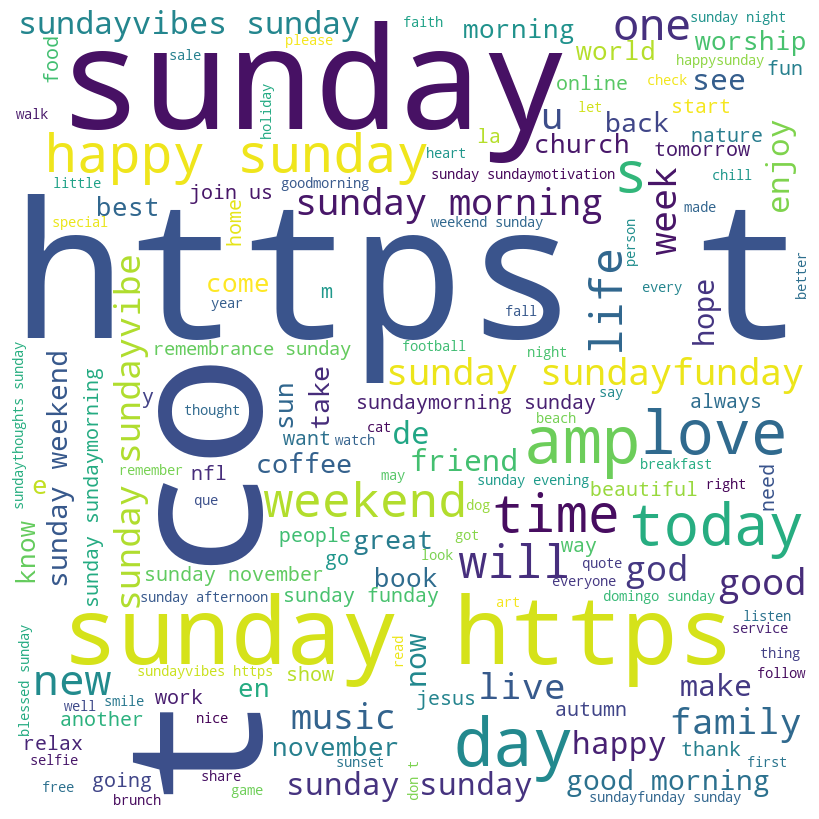

In [41]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
df = pd.read_csv(r"Sentimental_data.csv")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.content:
	
	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()
	
	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [42]:
from textblob import TextBlob

In [48]:
def polarity_ofthe_sentiment(text):
    return TextBlob(text).sentiment.polarity

def subjectivity(text):
    res = TextBlob(text)
    return res.sentiment.subjectivity

df['Polarity'] = df['content'].apply(polarity_ofthe_sentiment)
df["subjectivity"] = df['content'].apply(subjectivity)

In [51]:
import enchant
dictionary = enchant.Dict("en_US")
def perecentage_of_complex_words(text):
    words = text.split(" ")
    en_count = 0.0
    for word in words:
          if dictionary.check(word.strip()):
            en_count += 1
    percent = en_count/len(words) if len(words) != 0 else 0
    return percent*100
df["PERCENTAGE OF COMPLEX WORDS"] = df['content'].apply(perecentage_of_complex_words)

In [57]:
import re
def personal_pronoun(text):
    pronounRegex = re.compile(r'\b(I|you|he|she|it|we|they|me|him|her|us|them|(?-i:us))\b',re.I)
    pronouns = pronounRegex.findall(text)
    return pronouns
df['PERSONAL PRONOUNS'] = df['content'].apply(personal_pronoun)

In [67]:
def Analysizing(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
    
df['analysis']=df['Polarity'].apply(Analysizing)
df

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,mentionedUsers,coordinates,place,hashtags,cashtags,Polarity,subjectivity,PERCENTAGE OF COMPLEX WORDS,PERSONAL PRONOUNS,analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,THANK YOU Our popular #Sunday night pub quizze...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['Sunday', 'TheWorkingBoat', 'Falmouth']",NaN,0.385714,0.464286,76.923077,"[YOU, you]",positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars #gayweho #redressparty #mickysw...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,...,NaN,NaN,NaN,"['gayweho', 'redressparty', 'mickysweho', 'Sun...",NaN,0.000000,0.100000,16.666667,[],neutral
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God our week would SINDAY MOURNDAY TEA...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['CHURCH', 'SUNDAY', 'BDMS', 'SOMEWHEREINCAVIT...",NaN,-0.375000,0.625000,45.454545,[],negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,"['awesome', 'Attitude', 'Motivation', 'commitm...",NaN,1.000000,1.000000,9.090909,[],positive
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02 @C...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,['Sunday'],NaN,0.000000,0.000000,9.090909,[],neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,snscrape.modules.twitter.Tweet,https://twitter.com/BruddaZen/status/145748830...,2021-11-07 23:21:04+00:00,"can open space heart, within being, like cup.🤲...","I can open up space in my heart, within my bei...",1457488300273405952,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,NaN,NaN,"['sundayvibes', 'SundayFunday', 'SundayThought...",NaN,0.300000,0.666667,70.967742,[I],positive
5638,snscrape.modules.twitter.Tweet,https://twitter.com/YarnsWool/status/145748824...,2021-11-07 23:20:51+00:00,Linda caminata km) por salud placer. #openair ...,Linda caminata (8 km) por salud y placer. #ope...,1457488248528277504,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,...,NaN,{'_type': 'snscrape.modules.twitter.Coordinate...,"{'_type': 'snscrape.modules.twitter.Place', 'f...","['openair', 'healthylife', 'walk', 'Sunday', '...",NaN,0.000000,0.000000,15.384615,[],neutral
5639,snscrape.modules.twitter.Tweet,https://twitter.com/BringonFoxFever/status/145...,2021-11-07 23:20:26+00:00,@realkarlbeattie @Yfielding @marymbeattie #MyH...,@realkarlbeattie @Yfielding @marymbeattie #MyH...,1457488143544946692,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,3,...,"[{'_type': 'snscrape.modules.twitter.User', 'u...",NaN,NaN,"['MyHeroes', 'Sunday', 'animaloftheday']",NaN,0.800000,1.000000,12.500000,[],positive
5640,snscrape.modules.twitter.Tweet,https://twitter.com/Skye3411/status/1457487967...,2021-11-07 23:19:44+00:00,have about White Tea Rose bushes front yard. T...,I have about 20 White Tea Rose bushes in my fr...,1457487967669211145,"{'_type': 'snscrape.module

In [69]:
df.drop(['hashtags' , 'place' , 'cashtags' , 'coordinates' , 'retweetedTweet' , 'quotedTweet' , 'inReplyToTweetId','inReplyToUser' , 'mentionedUsers' , 'media' , 'tcooutlinks','outlinks','sourceUrl'] , axis = 1)

,_type,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,lang,source,sourceLabel,Polarity,subjectivity,PERCENTAGE OF COMPLEX WORDS,PERSONAL PRONOUNS,analysis
0,snscrape.modules.twitter.Tweet,https://twitter.com/theworkingboat/status/1460...,2021-11-16 09:54:20+00:00,THANK YOU Our popular #Sunday night pub quizze...,⭐ THANK YOU ⭐\n\nOur popular #Sunday night pub...,1460546769096425476,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1460546769096425476,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,0.385714,0.464286,76.923077,"[YOU, you]",positive
1,snscrape.modules.twitter.Tweet,https://twitter.com/WeHoLove/status/1460523193...,2021-11-16 08:20:39+00:00,Ahhh big stars #gayweho #redressparty #mickysw...,Ahhh big stars in #gayweho #redressparty #mick...,1460523193395933188,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,3,0,1460523193395933188,en,"<a href=""http://Gay-Los-Angeles.com"" rel=""nofo...",http://GayWestHollywood.com,0.000000,0.100000,16.666667,[],neutral
2,snscrape.modules.twitter.Tweet,https://twitter.com/bdsrated/status/1460518587...,2021-11-16 08:02:21+00:00,Without God our week would SINDAY MOURNDAY TEA...,Without God\nour week would be\nSINDAY\nMOURND...,1460518587639025673,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1460518587639025673,en,"<a href=""http://twitter.com/download/android"" ...",Twitter for Android,-0.375000,0.625000,45.454545,[],negative
3,snscrape.modules.twitter.Tweet,https://twitter.com/maggietranquila/status/146...,2021-11-16 07:34:44+00:00,#awesome #Attitude #Motivation #commitment #Su...,#awesome #Attitude #Motivation #commitment #Su...,1460511638856114185,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1460511638856114185,und,"<a href=""http://instagram.com"" rel=""nofollow"">...",Instagram,1.000000,1.000000,9.090909,[],positive
4,snscrape.modules.twitter.Tweet,https://twitter.com/BadalonaCC/status/14605071...,2021-11-16 07:16:46+00:00,@BadalonaCC #Sunday training with @omaree02 @C...,@BadalonaCC #Sunday training with @omaree02\n\...,1460507115982925826,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,2,4,0,1460507115982925826,en,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,0.000000,0.000000,9.090909,[],neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,snscrape.modules.twitter.Tweet,https://twitter.com/BruddaZen/status/145748830...,2021-11-07 23:21:04+00:00,"can open space heart, within being, like cup.🤲...","I can open up space in my heart, within my bei...",1457488300273405952,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,0,1457488300273405952,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,0.300000,0.666667,70.967742,[I],positive
5638,snscrape.modules.twitter.Tweet,https://twitter.com/YarnsWool/status/145748824...,2021-11-07 23:20:51+00:00,Linda caminata km) por salud placer. #openair ...,Linda caminata (8 km) por salud y placer. #ope...,1457488248528277504,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,1,2,0,1457488248528277504,es,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone,0.000000,0.000000,15.384615,[],neutral
5639,snscrape.modules.twitter.Tweet,https://twitter.com/BringonFoxFever/status/145...,2021-11-07 23:20:26+00:00,@realkarlbeattie @Yfielding @marymbeattie #MyH...,@realkarlbeattie @Yfielding @marymbeattie #MyH...,1457488143544946692,"{'_type': 'snscrape.modules.twitter.User', 'us...",2,0,3,0,1457488143544946692,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Twitter Web App,0.800000,1.000000,12.500000,[],positive
5640,snscrape.modules.twitter.Tweet,https://twitter.com/Skye3411/status/1457487967...,2021-11-07 23:19:44+00:00,have about White Tea Rose bushes front yard. T...,I have about 20 White Tea Rose bushes in my fr...,1457487967669211145,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,